# "초급자를 위한 손에 잡히는 딥러닝"
> "무료 배포용으로 만드는 초급자를 위한 딥러닝 강의자료, 제주코딩베이스캠프 유튜브에 무료 배포"

- toc: true
- branch: master
- badges: true
- comments: true
- author: 이호준
- categories: [TensorFlow, deep learning, 선형회귀]

## 수강 대상

* 인공지능, 머신러닝, 딥러닝에 대한 이해가 전혀 없으나 배워보고 싶으신 분
* 데이터 분석에 대한 이해가 전혀 없으신 분
* Python에 대한 이해가 없으신 분
* 빠른 시간 내 훑어보시길 원하시는 분
* 해당 강의자료는 생활코딩의 머신러닝 야학의 후속편으로 보시면 좋습니다.

## 결론

* Python은 무진장 좋다!
    * 난이도
    * 커뮤니티
    * 확장성
* 딥러닝도 무진장 좋다!
    * 심층 학습(Deep learning) > 표현 학습 > 기계 학습 > 인공 지능
    * 학습이란 "한 컴퓨터 프로그램이 어떤 과제류 T에 속하는 과제들을 수행하며 그 수행의 성과를 측정한 측도가 P라고 할 때. 만일 어떤 경험 E 때문에 T의 어떤 과제에 대한 성과 측도 P가 개선되었다면, 그 컴퓨터 프로그램은 경험 E로부터 학습한다고 말할 수 있다" - mitchell, 1997
* 만능은 아니다!
    * 개리 마르커스 교수의 에세이(https://arxiv.org/ftp/arxiv/papers/1801/1801.00631.pdf)에서 몇 가지 발췌
        1. 많은 데이터 필요(데이터는 신뢰할 수 있는 데이터인가?)
        2. 재활용 힘듬
        3. 충분히 투명하지 않음
        4. 인과관계와 상관관계의 구분이 어려움
        5. 신뢰성있는 엔지니어링의 어려움

## 영상강의 공부 방법

* Python을 조금 해보신 분이라면 따라서 타이핑을 쳐보세요.
* Python을 해보시지 않으신 분은 자료를 다운로드 받아 colab에서 Ctrl + Enter만 해보세요.
* 자료는 제주코딩베이스캠프 블로그에서 다운로드 가능 (https://paullabkorea.github.io/jupyternotebookblog/)
* 영상은 제주코딩베이스캠프 유튜브 채널에 올려두겠습니다.

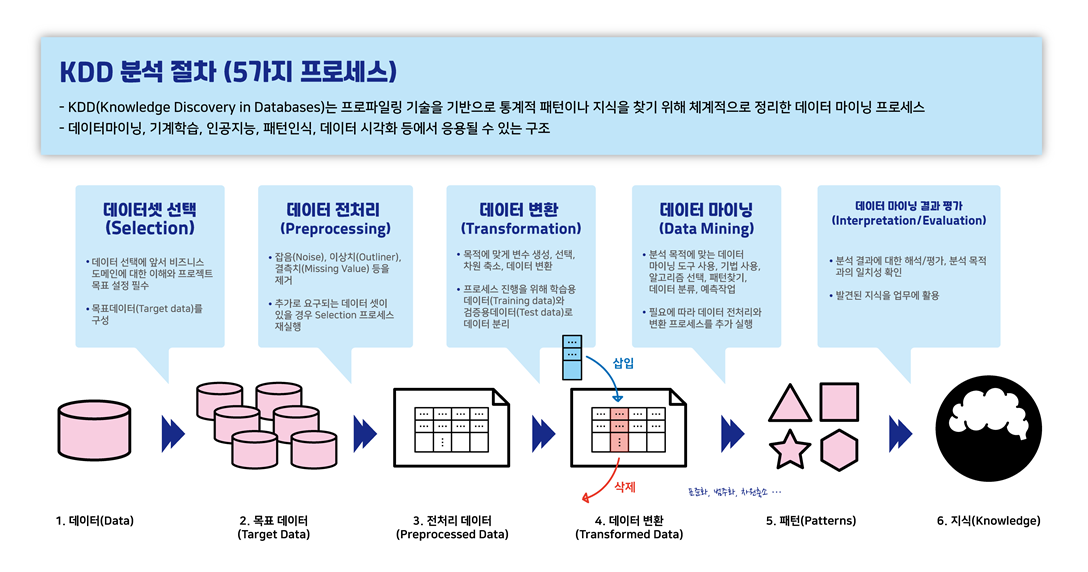

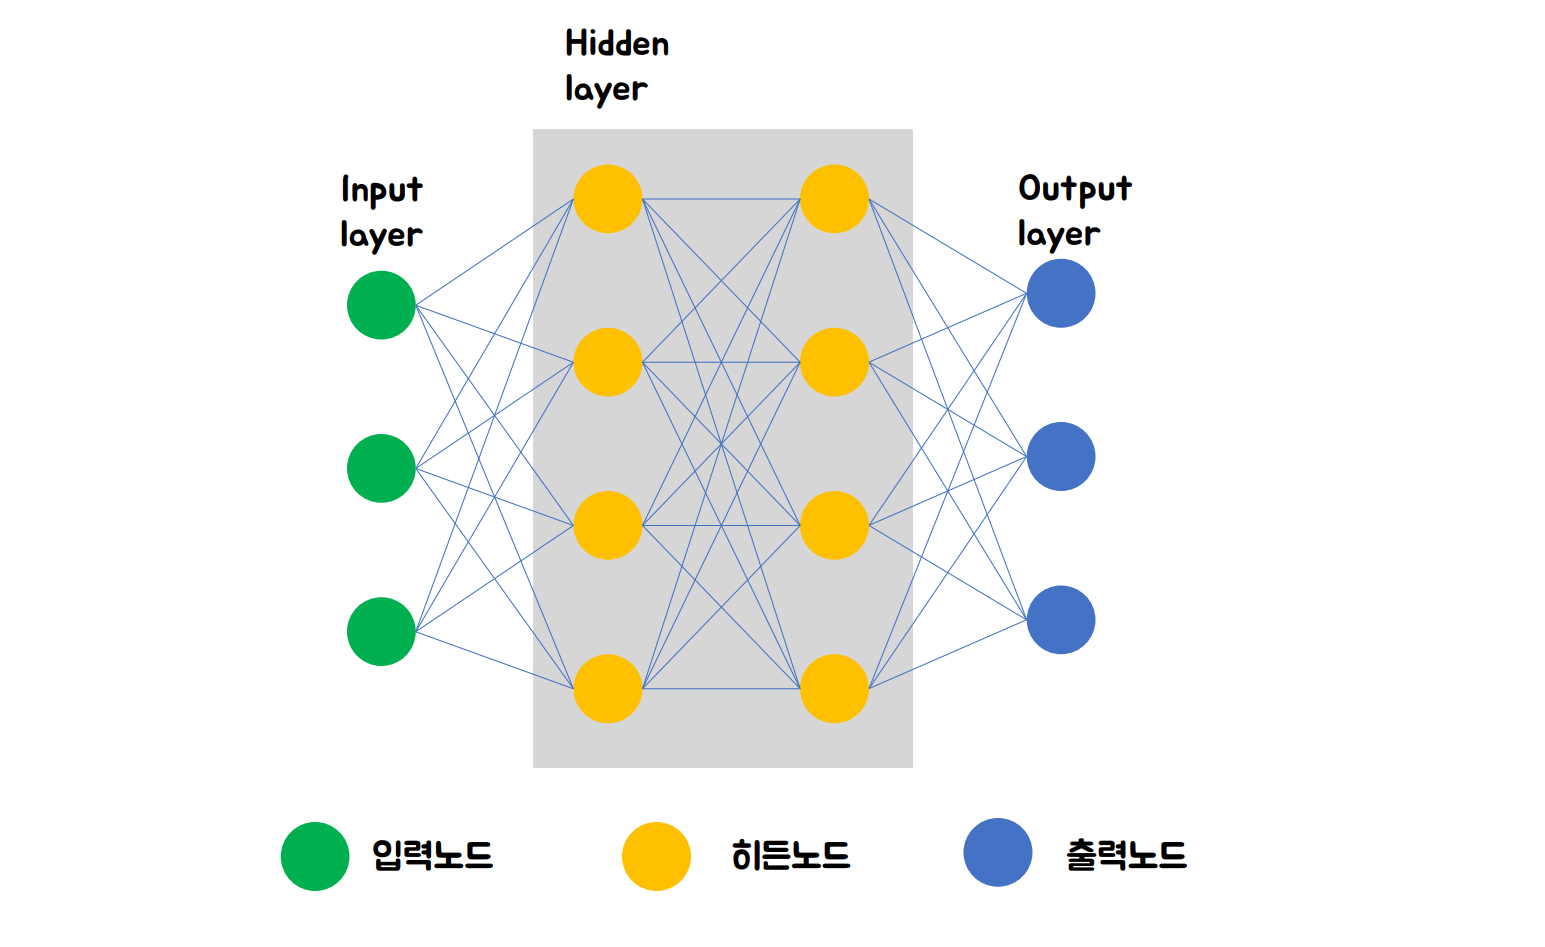

## 그래프의 한글 폰트

In [ ]:
!sudo apt install -y fonts-nanum*
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
# 런타임 -> 런타임 다시 시작 후 실행
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

## 데이터 생성

In [2]:
import pandas as pd # 데이터 분석을 위한 모듈
import numpy as np # 대규모 다차원 배열 연산을 위한 모듈

In [3]:
주가 = [ np.random.randint(10, 50) + i*2 for i in range(100) ]

In [ ]:
import matplotlib.pyplot as plt # 시각화 모듈

plt.plot(np.arange(1, 101), 주가)
plt.show()

## 딥러닝

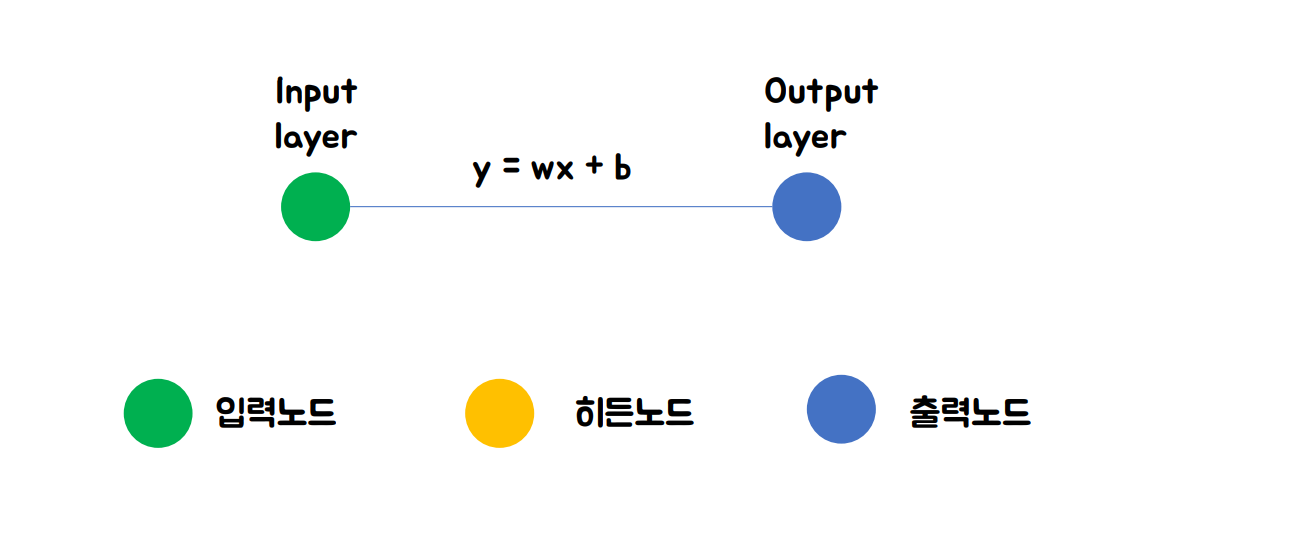

In [ ]:
독립 = pd.DataFrame(np.arange(1, 101))
종속 = pd.DataFrame(주가)
독립.shape, 종속.shape

((100, 1), (100, 1))

In [ ]:
import tensorflow as tf # 구글이 2015년 오픈소스로 공개한 딥러닝 라이브러리 

In [ ]:
#모델 준비
X = tf.keras.layers.Input(shape=[1]) # 독립변수의 col
Y = tf.keras.layers.Dense(1)(X) # 종속변수의 col(뉴런의 개수)
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse') # MSE(Mean squared error)

In [ ]:
model.fit(독립, 종속, epochs=10000, verbose=0)
model.fit(독립, 종속, epochs=10)

In [ ]:
model.predict([50])
model.predict([40])

In [ ]:
model.predict(독립)

In [ ]:
model.get_weights()

In [ ]:
2.072317 * 50 + 22.033388

In [ ]:
model.predict([50])

In [ ]:
plt.plot(np.arange(1, 101), 주가)
plt.plot(np.arange(1, 101), 2.07 * np.arange(1, 101) + 22.03)

plt.show()

In [ ]:
오차값 = 종속 - model.predict(독립)
오차값

In [ ]:
오차값의제곱 = 오차값 ** 2
오차값의제곱

In [ ]:
(오차값의제곱.sum())/100 ## MSE

## 최소 제곱법

* y = ax + b
* 참고자료 : https://ko.wikipedia.org/wiki/%EC%B5%9C%EC%86%8C%EC%A0%9C%EA%B3%B1%EB%B2%95
* 구하고자 하는 방정식은 y = ax + b이다. 상수 a, b값을 안다면, a, b는 다음으로 계산할 수 있다.
* a :
$${\displaystyle a={\frac {n\Sigma XY-\Sigma X\Sigma Y}{n\Sigma X^{2}-\Sigma X\Sigma X}}}$$

* b :
$${\displaystyle b={\frac {\Sigma X^{2}\Sigma Y-\Sigma X\Sigma XY}{n\Sigma X^{2}-\Sigma X\Sigma X}}}$$

In [ ]:
두수의곱 = 독립*종속
int(100 * 두수의곱.sum())

In [ ]:
int(독립.sum() * 종속.sum())

In [ ]:
int(100 * (독립 ** 2).sum())

In [ ]:
int(독립.sum() * 독립.sum())

In [ ]:
분자 = int(100 * 두수의곱.sum()) - int(독립.sum() * 종속.sum())
분모 = int(100 * (독립 ** 2).sum()) - int(독립.sum() * 독립.sum())

In [ ]:
분자 / 분모

In [ ]:
model.get_weights()

${\displaystyle b={\frac {\Sigma X^{2}\Sigma Y-\Sigma X\Sigma XY}{n\Sigma X^{2}-\Sigma X\Sigma X}}}$

In [ ]:
분자 = ((독립**2).sum() * 종속.sum()) - (독립.sum() * (독립*종속).sum())
분모 = (100 * (독립**2).sum()) - (독립.sum() * 독립.sum())

In [ ]:
분자 / 분모

## 단순데이터의 히든레이어

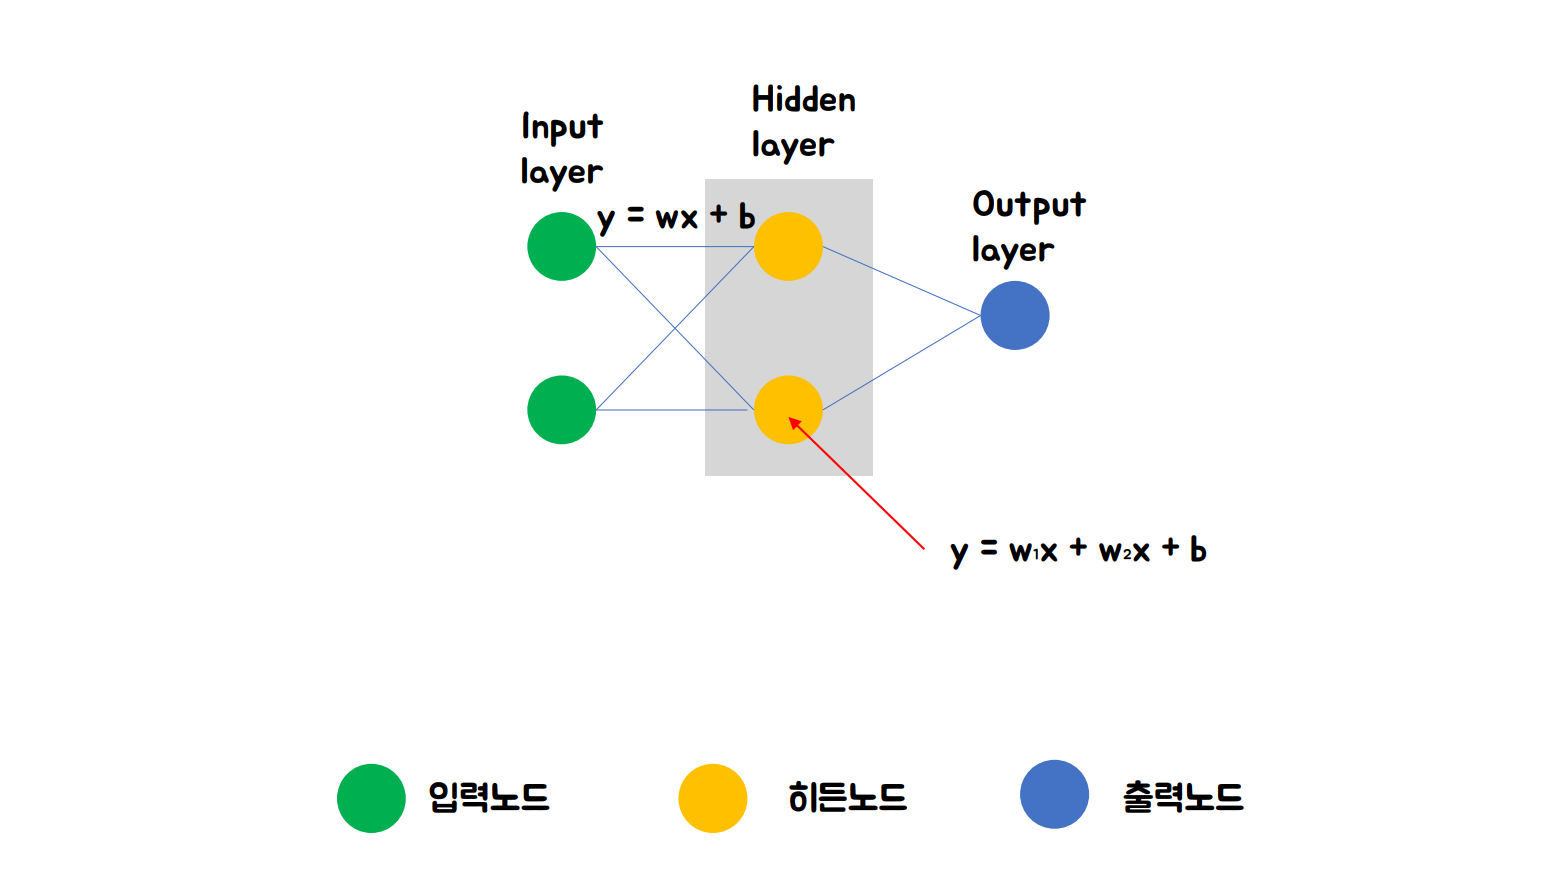

In [ ]:
매출액 = [2, 5, 10, 20, 40, 80]
광고액 = [1, 2, 4, 6, 8, 10]
순익 = [1, 1.5, 3, 10, 20, 60]

In [ ]:
plt.plot(np.arange(1, 7), 매출액, label='매출액')
plt.plot(np.arange(1, 7), 광고액, label='광고액')
plt.plot(np.arange(1, 7), 순익, label='순익')

plt.legend()
plt.show()

In [ ]:
독립 = pd.DataFrame({
    '매출액' : 매출액,
    '광고액' : 광고액
})
종속 = pd.DataFrame({
    '순익' : 순익
})
독립.shape, 종속.shape

In [ ]:
독립

In [ ]:
#모델 준비
X = tf.keras.layers.Input(shape=[2]) # 독립변수의 col
## 1. 히든 레이어의 노드(뉴런) 수는 2개부터 5개까지 점차 늘려보고 그래프를 확인해보세요.
H = tf.keras.layers.Dense(2, activation='swish')(X) 
# activation은 뉴런 출력에 적용할 함수(대표적으로 swish, sigmoid, softmax)
## 2. 히든 레이어의 수를 2개, 3개로 점차 늘려보고 그래프를 확인해보세요.
# H = tf.keras.layers.Dense(2, activation='swish')(H)
Y = tf.keras.layers.Dense(1)(H) # 종속변수의 col
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse') # MSE(Mean squared error)

In [ ]:
model.fit(독립, 종속, epochs=10000, verbose=0)
model.fit(독립, 종속, epochs=10)

In [ ]:
model.get_weights()

In [ ]:
model.predict([[10, 4]])

In [ ]:
# 예측 데이터 확인
model.predict(독립)

In [ ]:
# 실제 종속 데이터 확인
종속

In [ ]:
# 2개일 때 그래프()
plt.plot(np.arange(1, 7), model.predict(독립), label='예측값')
plt.plot(np.arange(1, 7), 종속, label='실제값')

plt.legend()
plt.show()

## 복잡 데이터의 히든레이어
* 그럼 주가는 잘 맞출까? (곡선 형태)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

광고액 = [ np.random.randint(10, 50) + np.log(i*5) * 50 for i in range(1, 101) ]
계절성 = [ np.sin(i/3)*100 + i*3 + j*2 for i, j in zip(np.arange(1, 101), 광고액) ]
매출액 = [i**(np.log(np.log(i))) + j for i, j in zip(np.arange(1, 101), 계절성) ]

plt.plot(np.arange(1, 101), 광고액, label='a')
plt.plot(np.arange(1, 101), 계절성, label='b')
plt.plot(np.arange(1, 101), 매출액, label='c')

plt.legend()
plt.show()

In [ ]:
독립 = pd.DataFrame({
    '계절성' : 계절성,
    '광고액' : 광고액
})
종속 = pd.DataFrame({
    '매출액' : 매출액
})
독립.shape, 종속.shape

In [ ]:
import tensorflow as tf

#모델 준비
X = tf.keras.layers.Input(shape=[2]) # 독립변수의 col
H = tf.keras.layers.Dense(200, activation='swish')(X) # 노드의 수는 천천히 늘려감! (2 ~ 200)
# H = tf.keras.layers.Dense(5, activation='swish')(H) # 처음에는 주석처리!
Y = tf.keras.layers.Dense(1)(H) # 종속변수의 col
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse') # MSE(Mean squared error)

In [ ]:
model.fit(독립, 종속, epochs=10000, verbose=0)
model.fit(독립, 종속, epochs=10)

In [ ]:
# 히든 레이어 1개의 노드의 개수가 2개
plt.plot(np.arange(1, 101), model.predict(독립), label='예측값')
plt.plot(np.arange(1, 101), 종속, label='실제값')

plt.legend()
plt.show()

In [ ]:
# 히든 레이어 1개의 노드의 개수가 200개
plt.plot(np.arange(1, 101), model.predict(독립), label='예측값')
plt.plot(np.arange(1, 101), 종속, label='실제값')

plt.legend()
plt.show()

In [ ]:
import tensorflow as tf

#모델 준비
X = tf.keras.layers.Input(shape=[2]) # 독립변수의 col
H = tf.keras.layers.Dense(5, activation='swish')(X) # 노드의 수는 천천히 늘려감! (2 ~ 5)
H = tf.keras.layers.Dense(5, activation='swish')(H) # 천천히 늘려감! (2 ~ 5)
H = tf.keras.layers.Dense(5, activation='swish')(H) # 천천히 늘려감! (2 ~ 5)
H = tf.keras.layers.Dense(5, activation='swish')(H) # 천천히 늘려감! (2 ~ 5)
H = tf.keras.layers.Dense(5, activation='swish')(H) # 천천히 늘려감! (2 ~ 5)
Y = tf.keras.layers.Dense(1)(H) # 종속변수의 col
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse') # MSE(Mean squared error)

In [ ]:
model.fit(독립, 종속, epochs=10000, verbose=0)
model.fit(독립, 종속, epochs=10)

In [ ]:
plt.plot(np.arange(1, 101), model.predict(독립), label='예측값')
plt.plot(np.arange(1, 101), 종속, label='실제값')

plt.legend()
plt.show()

In [ ]:
import tensorflow as tf

#모델 준비
X = tf.keras.layers.Input(shape=[2]) # 독립변수의 col
H = tf.keras.layers.Dense(5, activation='swish')(X) # 노드의 수는 천천히 늘려감! (2 ~ 5)
for _ in range(10):
    H = tf.keras.layers.Dense(5, activation='swish')(H) # 천천히 늘려감! (2 ~ 5)
Y = tf.keras.layers.Dense(1)(H) # 종속변수의 col
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse') # MSE(Mean squared error)

In [ ]:
model.fit(독립, 종속, epochs=10000, verbose=0)
model.fit(독립, 종속, epochs=10)

In [ ]:
# 히든 레이어 10개 쌓았을 때(노드의 수는 5개로 고정)
plt.plot(np.arange(1, 101), model.predict(독립), label='예측값')
plt.plot(np.arange(1, 101), 종속, label='실제값')

plt.legend()
plt.show()

* 히든레이어는 1개 ~ 4개를 쌓아보고 정확도 측정하는 것이 보통.
* 노드는 100개 ~ 200개를 쌓아보고 정확도 측정.
* 은닉 단위의 설계는 실무 지침이 될만한 결정적인 이론이 나오지 않음(심층학습, 제이펍, 211page)
* CNN이나 RNN 으로 넘어가기 전 좀 더 단순한 데이터로 신경망에 대해 학습할 것을 권함.

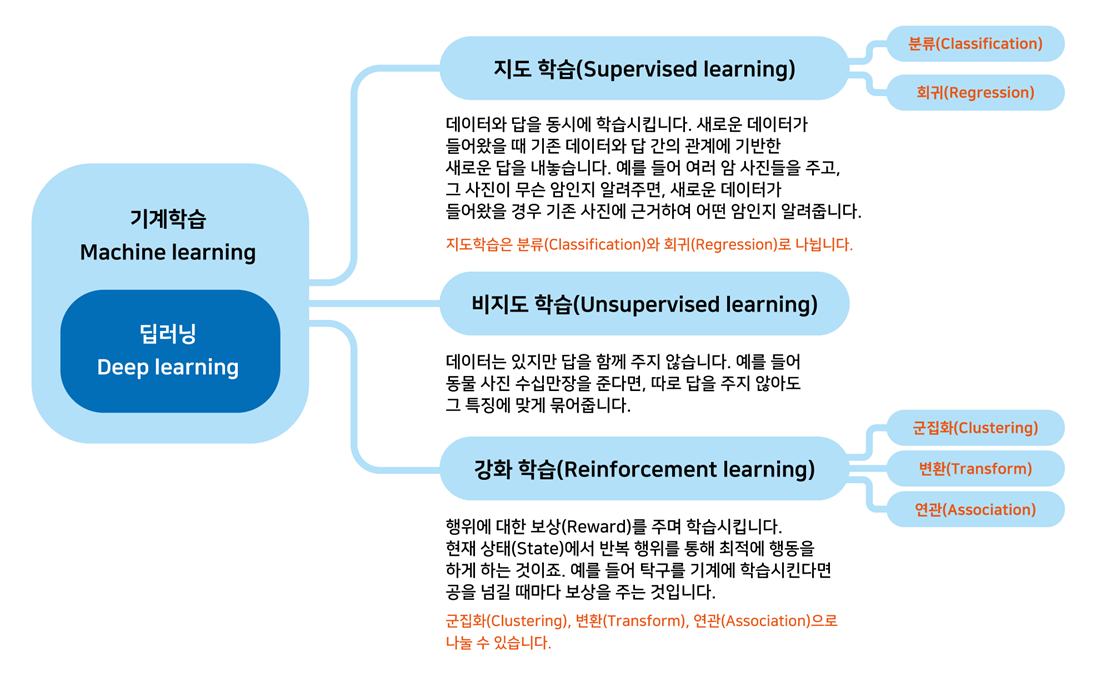

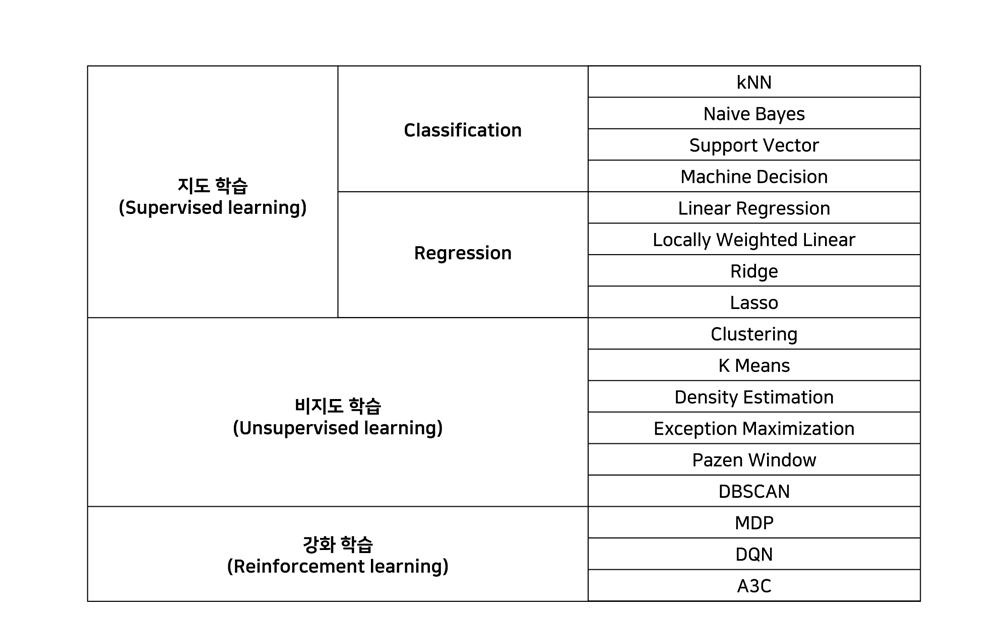